<a href="https://colab.research.google.com/github/abdulaziz-ibrahim27/smoke_detection_problem/blob/main/smoke_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import essential libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()

In [2]:
# fetch the data from github
!wget https://raw.githubusercontent.com/abdulaziz-ibrahim27/files_host/main/smoke_detection_iot.csv

--2023-05-31 17:46:12--  https://raw.githubusercontent.com/abdulaziz-ibrahim27/files_host/main/smoke_detection_iot.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5834376 (5.6M) [text/plain]
Saving to: ‘smoke_detection_iot.csv’

smoke_detection_iot 100%[===================>]   5.56M  --.-KB/s    in 0.08s   

2023-05-31 17:46:13 (71.6 MB/s) - ‘smoke_detection_iot.csv’ saved [5834376/5834376]



# Explanatory Data Analysis

In [3]:
df = pd.read_csv('smoke_detection_iot.csv')

In [4]:
df.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [5]:
df.columns

Index(['Unnamed: 0', 'UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]',
       'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5',
       'NC0.5', 'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm'],
      dtype='object')

In [6]:
df.columns = df.columns.str.lower()
df.columns

Index(['unnamed: 0', 'utc', 'temperature[c]', 'humidity[%]', 'tvoc[ppb]',
       'eco2[ppm]', 'raw h2', 'raw ethanol', 'pressure[hpa]', 'pm1.0', 'pm2.5',
       'nc0.5', 'nc1.0', 'nc2.5', 'cnt', 'fire alarm'],
      dtype='object')

In [7]:
df.shape

(62630, 16)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   unnamed: 0      62630 non-null  int64  
 1   utc             62630 non-null  int64  
 2   temperature[c]  62630 non-null  float64
 3   humidity[%]     62630 non-null  float64
 4   tvoc[ppb]       62630 non-null  int64  
 5   eco2[ppm]       62630 non-null  int64  
 6   raw h2          62630 non-null  int64  
 7   raw ethanol     62630 non-null  int64  
 8   pressure[hpa]   62630 non-null  float64
 9   pm1.0           62630 non-null  float64
 10  pm2.5           62630 non-null  float64
 11  nc0.5           62630 non-null  float64
 12  nc1.0           62630 non-null  float64
 13  nc2.5           62630 non-null  float64
 14  cnt             62630 non-null  int64  
 15  fire alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [9]:
df.describe()

,unnamed: 0,utc,temperature[c],humidity[%],tvoc[ppb],eco2[ppm],raw h2,raw ethanol,pressure[hpa],pm1.0,pm2.5,nc0.5,nc1.0,nc2.5,cnt,fire alarm
count,62630.000000,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,31314.500000,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,18079.868017,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,0.000000,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15657.250000,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,31314.500000,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,46971.750000,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,62629.000000,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


In [10]:
# check the correlation between the variables
df.corr()

,unnamed: 0,utc,temperature[c],humidity[%],tvoc[ppb],eco2[ppm],raw h2,raw ethanol,pressure[hpa],pm1.0,pm2.5,nc0.5,nc1.0,nc2.5,cnt,fire alarm
unnamed: 0,1.000000,0.551987,0.425636,-0.498121,0.248813,0.160665,-0.232854,0.083094,-0.580829,0.151785,0.128487,0.162053,0.126418,0.100300,-0.053262,-0.361351
utc,0.551987,1.000000,-0.164174,-0.391907,0.180731,0.132100,-0.151088,0.166555,-0.434375,0.123168,0.105304,0.130288,0.103695,0.083234,-0.251595,-0.389404
temperature[c],0.425636,-0.164174,1.000000,-0.243986,0.082442,0.079265,-0.135540,-0.037343,-0.251203,0.037330,0.032084,0.039291,0.031608,0.025526,-0.089850,-0.163902
humidity[%],-0.498121,-0.391907,-0.243986,1.000000,-0.488878,-0.369095,0.247199,0.068782,0.694614,-0.236538,-0.178882,-0.277389,-0.174224,-0.118502,0.251965,0.399846
tvoc[ppb],0.248813,0.180731,0.082442,-0.488878,1.000000,0.606118,-0.653053,-0.673715,-0.220004,0.597366,0.477424,0.670657,0.467386,0.344721,-0.057703,-0.214743
eco2[ppm],0.160665,0.132100,0.079265,-0.369095,0.606118,1.000000,-0.682785,-0.506695,-0.326043,0.665482,0.572691,0.699604,0.564252,0.456323,-0.106681,-0.097006
raw h2,-0.232854,-0.151088,-0.135540,0.247199,-0.653053,-0.682785,1.000000,0.631495,0.303090,-0.530714,-0.431079,-0.587769,-0.422626,-0.318518,-0.031036,0.107007
raw ethanol,0.083094,0.166555,-0.037343,0.068782,-0.673715,-0.506695,0.631495,1.000000,-0.075926,-0.480698,-0.393192,-0.529186,-0.385720,-0.293351,-0.511995,-0.340652
pressure[hpa],-0.580829,-0.434375,-0.251203,0.694614,-0.220004,-0.326043,0.303090,-0.075926,1.000000,-0.258938,-0.243071,-0.248657,-0.241148,-0.213390,0.186290,0.249797
pm1.0,0.151785,0.123168,0.037330,-0.236538,0.597366,0.665482,-0.530714,-0.480698,-0.258938,1.000000,0.956118,0.940045,0.949860,0.854901,-0.093700,-0.110552


The dataset is a little bit messy, let's select some set of columns to do an initial column selection for correlation.

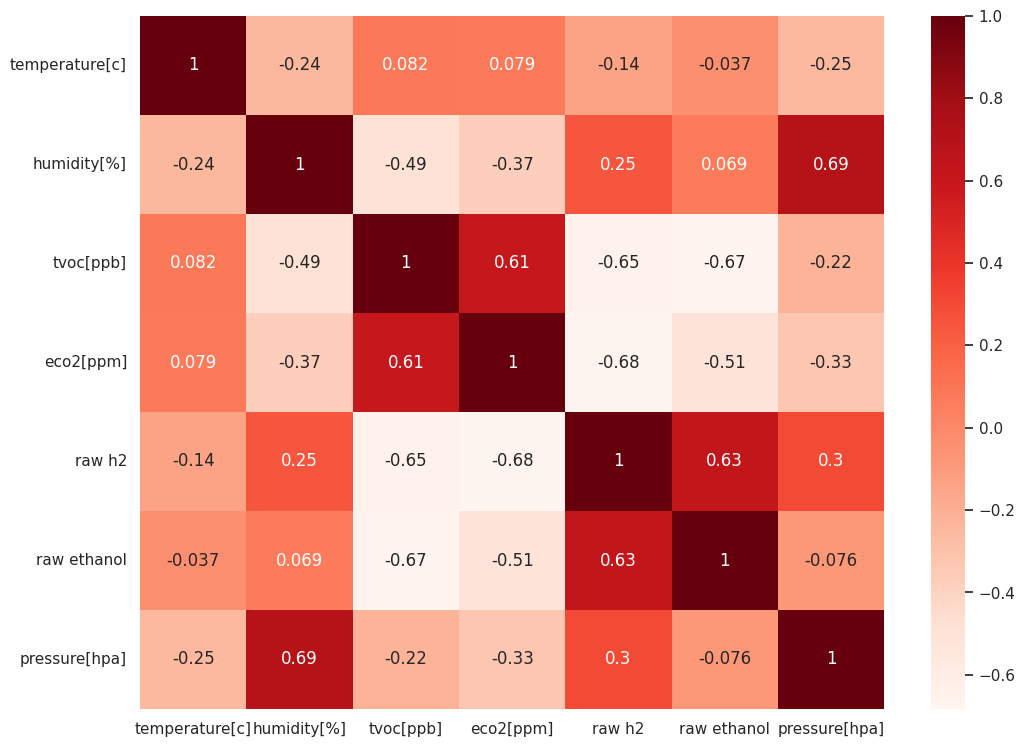

In [11]:
df_temp = df.loc[:, 'temperature[c]':'pressure[hpa]']
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(df_temp.corr(), annot=True, cmap='Reds');

a lot of data is correlated, it might be difficult to use a machine learning approach, deep learning might be useful here since its more robust.


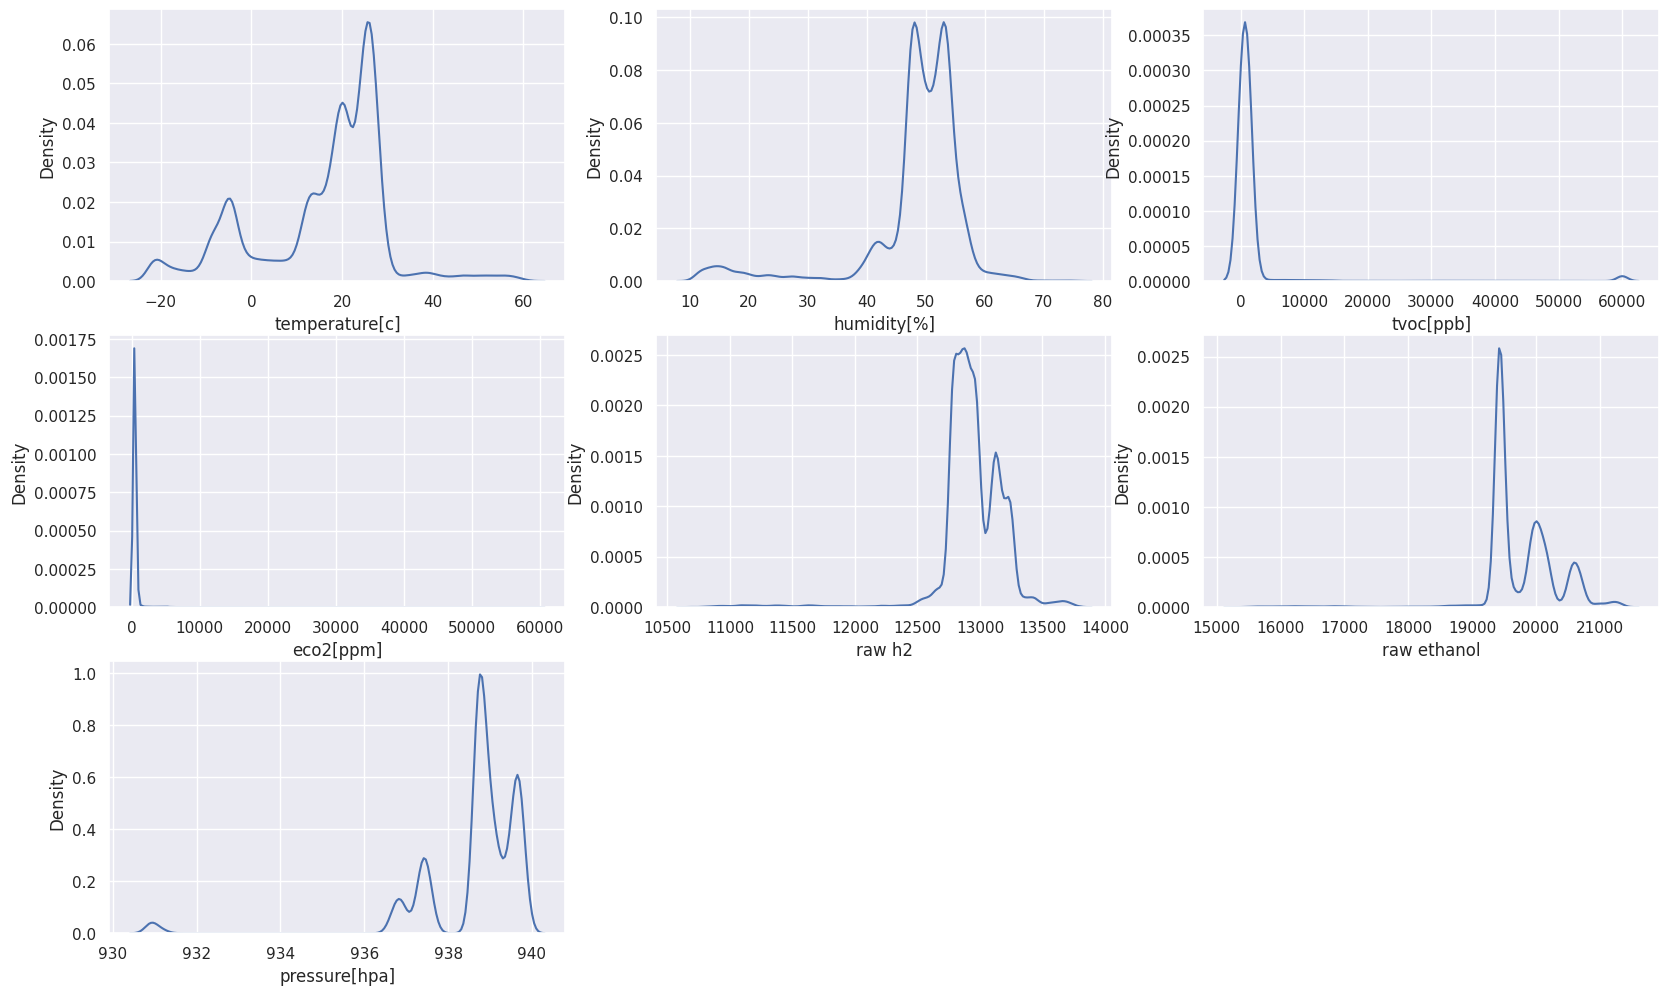

In [12]:
plt.figure(figsize=(20, 12))
# df_temp.iloc[:, 0]

for i in range(1, 8):
  col = df_temp.iloc[:, i - 1]
  plt.subplot(3, 3, i)
  sns.kdeplot(col);

there exist outliers in the: {pressure, eco2, tvoc} columns

# prepping data for a tf model


In [13]:
# fetch labels
y = df['fire alarm']
y

0        0
1        0
2        0
3        0
4        0
        ..
62625    0
62626    0
62627    0
62628    0
62629    0
Name: fire alarm, Length: 62630, dtype: int64

`Index(['unnamed: 0', 'utc', 'temperature[c]', 'humidity[%]', 'tvoc[ppb]',
       'eco2[ppm]', 'raw h2', 'raw ethanol', 'pressure[hpa]', 'pm1.0', 'pm2.5',
       'nc0.5', 'nc1.0', 'nc2.5', 'cnt', 'fire alarm'],
      dtype='object')`

In [14]:
# drop some unneeded columns that creates noise

X = df.drop(['unnamed: 0', 'utc', 'cnt', 'fire alarm'], axis=1)
X

,temperature[c],humidity[%],tvoc[ppb],eco2[ppm],raw h2,raw ethanol,pressure[hpa],pm1.0,pm2.5,nc0.5,nc1.0,nc2.5
0,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000
1,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000
2,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000
3,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000
4,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
62625,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015
62626,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015
62627,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014
62628,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014


In [15]:
len(X.columns), len(df.columns)

(12, 16)

In [16]:
# Split data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=21)

In [17]:
x_train

,temperature[c],humidity[%],tvoc[ppb],eco2[ppm],raw h2,raw ethanol,pressure[hpa],pm1.0,pm2.5,nc0.5,nc1.0,nc2.5
53197,25.810,47.89,131,418,12784,20591,937.336,1.83,1.90,12.57,1.961,0.044
7031,-5.233,50.81,226,400,13138,20032,939.546,0.45,0.47,3.12,0.487,0.011
40608,26.830,47.99,1159,420,12879,19438,938.805,1.62,1.68,11.16,1.740,0.039
57195,26.595,45.37,28,402,12833,20748,937.540,2.26,2.35,15.55,2.425,0.055
26837,18.960,48.26,65,400,13124,20002,939.592,0.61,0.64,4.23,0.659,0.015
...,...,...,...,...,...,...,...,...,...,...,...,...
16432,12.697,53.35,1134,400,12889,19448,938.738,1.46,1.51,10.04,1.565,0.035
8964,-5.214,52.62,377,400,13047,19875,939.270,0.42,0.44,2.90,0.452,0.010
5944,-8.732,53.20,86,400,13227,20177,939.625,1.97,2.05,13.55,2.113,0.048
5327,-9.170,54.28,18,400,13255,20214,939.712,2.22,2.31,15.29,2.384,0.054


In [18]:
y_train

53197    0
7031     1
40608    1
57195    0
26837    0
        ..
16432    1
8964     1
5944     1
5327     1
15305    1
Name: fire alarm, Length: 50104, dtype: int64

In [19]:
model_baseline = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(12, )),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_baseline.compile(loss='binary_crossentropy',
                       optimizer='adam',
                       metrics=['accuracy'])

history_baseline = model_baseline.fit(x_train, y_train, epochs=10)
print('model_baseline evaluation:\n')
acc_baseline = model_baseline.evaluate(x_test, y_test)

Epoch 1/10
1566/1566 [==============================] - 13s 4ms/step - loss: 12.9459 - accuracy: 0.8325
Epoch 2/10
1566/1566 [==============================] - 7s 4ms/step - loss: 3.0393 - accuracy: 0.8812
Epoch 3/10
1566/1566 [==============================] - 7s 4ms/step - loss: 1.5438 - accuracy: 0.8965
Epoch 4/10
1566/1566 [==============================] - 6s 4ms/step - loss: 0.9688 - accuracy: 0.9036
Epoch 5/10
1566/1566 [==============================] - 7s 4ms/step - loss: 0.7748 - accuracy: 0.9075
Epoch 6/10
1566/1566 [==============================] - 6s 4ms/step - loss: 0.5075 - accuracy: 0.9246
Epoch 7/10
1566/1566 [==============================] - 7s 5ms/step - loss: 0.1976 - accuracy: 0.9289
Epoch 8/10
1566/1566 [==============================] - 7s 4ms/step - loss: 0.1776 - accuracy: 0.9311
Epoch 9/10
1566/1566 [==============================] - 7s 4ms/step - loss: 0.1753 - accuracy: 0.9355
Epoch 10/10
1566/1566 [==============================] - 7s 5ms/step - loss: 0.1

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_preds = tf.round(model_baseline.predict(x_test))
y_preds[: 5]


392/392 [==============================] - 1s 2ms/step


<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)>

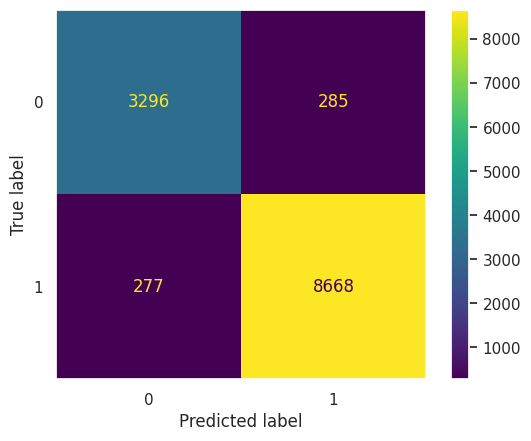

In [21]:
cm = confusion_matrix(y_true=y_test,
                      y_pred=y_preds)
ConfusionMatrixDisplay(cm).plot();
plt.grid(False);

there are a lot of false positives and false negatives.

let's check the distrubtion of classes

In [22]:
# calculate the distrubtion of classes
filt = y == 1
dist = len(y_train[filt]) / len(y_train)
print(f"{dist:.2f}% of samples are in the 1 class")

0.71% of samples are in the 1 class


let's try to increase the complexity of the model and see how does that effect performance.

In [23]:
model_complex = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(12, )),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_complex.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

history_complex = model_complex.fit(x_train, y_train, epochs=10)
print('model_complex evaluation:\n')
acc_complex = model_complex.evaluate(x_test, y_test)

Epoch 1/10
1566/1566 [==============================] - 9s 5ms/step - loss: 12.1240 - accuracy: 0.8356
Epoch 2/10
1566/1566 [==============================] - 6s 4ms/step - loss: 2.0960 - accuracy: 0.8864
Epoch 3/10
1566/1566 [==============================] - 7s 5ms/step - loss: 0.7353 - accuracy: 0.9031
Epoch 4/10
1566/1566 [==============================] - 7s 4ms/step - loss: 0.3117 - accuracy: 0.9219
Epoch 5/10
1566/1566 [==============================] - 7s 5ms/step - loss: 0.2057 - accuracy: 0.9292
Epoch 6/10
1566/1566 [==============================] - 7s 4ms/step - loss: 0.1722 - accuracy: 0.9348
Epoch 7/10
1566/1566 [==============================] - 7s 4ms/step - loss: 0.1576 - accuracy: 0.9402
Epoch 8/10
1566/1566 [==============================] - 7s 4ms/step - loss: 0.1369 - accuracy: 0.9490
Epoch 9/10
1566/1566 [==============================] - 6s 4ms/step - loss: 0.5802 - accuracy: 0.9535
Epoch 10/10
1566/1566 [==============================] - 7s 5ms/step - loss: 0.36

In [24]:
y_preds = tf.round(model_complex.predict(x_test))
y_preds[:5]

392/392 [==============================] - 1s 2ms/step


<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)>

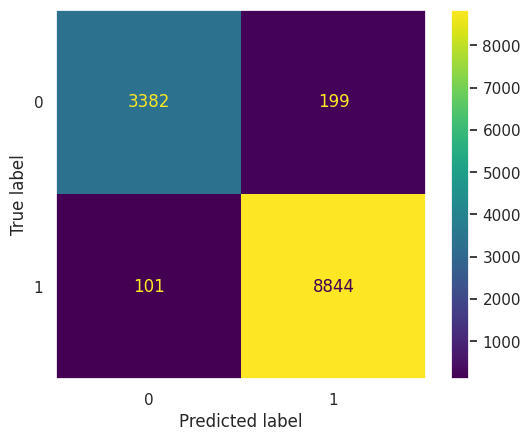

In [25]:
cm = confusion_matrix(y_true=y_test, y_pred=y_preds)
ConfusionMatrixDisplay(cm).plot();
plt.grid(False);

increasing the complexity of the model allowed it to learn more patterns therefore it became more accurate and more robust to false positives and negatives but can the model improve further?
introducing regularization.

In [26]:
# same as baseline architecture but with regularization.
model_L2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(12, )),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu', kernel_regularizer='L2'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_L2.compile(loss='binary_crossentropy',
                       optimizer='adam',
                       metrics=['accuracy'])

history_L2 = model_L2.fit(x_train, y_train, epochs=10)
print('model_L2 evaluation:\n')
acc_L2 = model_L2.evaluate(x_test, y_test)

Epoch 1/10
1566/1566 [==============================] - 9s 5ms/step - loss: 13.7547 - accuracy: 0.8322
Epoch 2/10
1566/1566 [==============================] - 7s 5ms/step - loss: 4.5779 - accuracy: 0.8780
Epoch 3/10
1566/1566 [==============================] - 7s 4ms/step - loss: 1.9106 - accuracy: 0.9047
Epoch 4/10
1566/1566 [==============================] - 7s 5ms/step - loss: 0.8098 - accuracy: 0.9226
Epoch 5/10
1566/1566 [==============================] - 7s 4ms/step - loss: 0.6376 - accuracy: 0.9232
Epoch 6/10
1566/1566 [==============================] - 7s 5ms/step - loss: 0.9998 - accuracy: 0.9145
Epoch 7/10
1566/1566 [==============================] - 7s 5ms/step - loss: 0.4014 - accuracy: 0.9400
Epoch 8/10
1566/1566 [==============================] - 7s 4ms/step - loss: 0.3691 - accuracy: 0.9350
Epoch 9/10
1566/1566 [==============================] - 7s 5ms/step - loss: 0.5352 - accuracy: 0.8378
Epoch 10/10
1566/1566 [==============================] - 7s 4ms/step - loss: 0.63

392/392 [==============================] - 1s 2ms/step


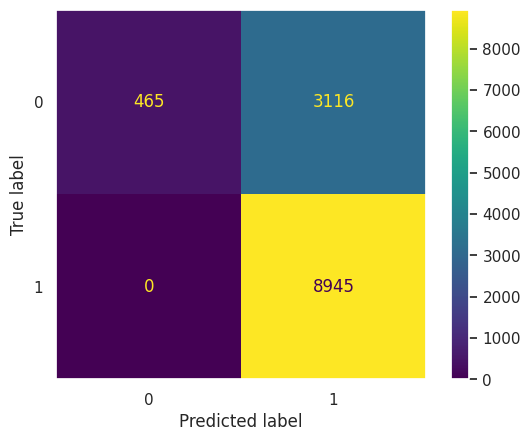

In [27]:
y_preds = tf.round(model_L2.predict(x_test))
cm = confusion_matrix(y_true=y_test, y_pred=y_preds)
ConfusionMatrixDisplay(cm).plot();
plt.grid(False);

interesting observation, the model has a lot of false positives maybe its caused to the restrictions of the regularization kernel lets change it to another layer

In [28]:
# same as baseline architecture but with regularization.
model_L2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(12, )),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu', kernel_regularizer='L2'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_L2.compile(loss='binary_crossentropy',
                       optimizer='adam',
                       metrics=['accuracy'])

history_L2 = model_L2.fit(x_train, y_train, epochs=10)
print('model_L2 evaluation:\n')
acc_L2 = model_L2.evaluate(x_test, y_test)

Epoch 1/10
1566/1566 [==============================] - 8s 4ms/step - loss: 10.8138 - accuracy: 0.8418
Epoch 2/10
1566/1566 [==============================] - 7s 5ms/step - loss: 2.5797 - accuracy: 0.8808
Epoch 3/10
1566/1566 [==============================] - 7s 5ms/step - loss: 0.8240 - accuracy: 0.9124
Epoch 4/10
1566/1566 [==============================] - 7s 4ms/step - loss: 0.5725 - accuracy: 0.9144
Epoch 5/10
1566/1566 [==============================] - 7s 5ms/step - loss: 0.5085 - accuracy: 0.9145
Epoch 6/10
1566/1566 [==============================] - 7s 4ms/step - loss: 0.3686 - accuracy: 0.9301
Epoch 7/10
1566/1566 [==============================] - 8s 5ms/step - loss: 0.3172 - accuracy: 0.9309
Epoch 8/10
1566/1566 [==============================] - 7s 5ms/step - loss: 0.3259 - accuracy: 0.9294
Epoch 9/10
1566/1566 [==============================] - 7s 4ms/step - loss: 0.5918 - accuracy: 0.9384
Epoch 10/10
1566/1566 [==============================] - 7s 5ms/step - loss: 0.44

392/392 [==============================] - 1s 2ms/step


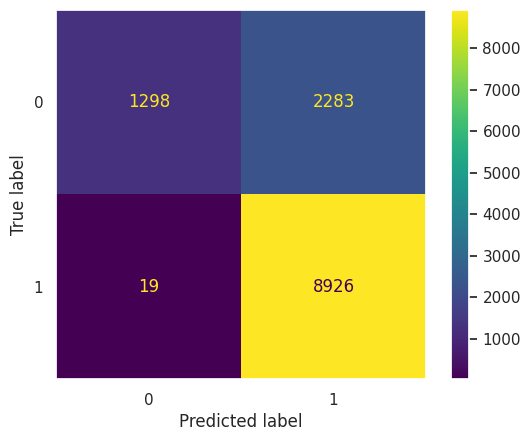

In [29]:
y_preds = tf.round(model_L2.predict(x_test))
cm = confusion_matrix(y_true=y_test, y_pred=y_preds)
ConfusionMatrixDisplay(cm).plot();
plt.grid(False);

lets try to plot the baseline model and the regularized model CMs but before that let's functionize it.

392/392 [==============================] - 1s 2ms/step


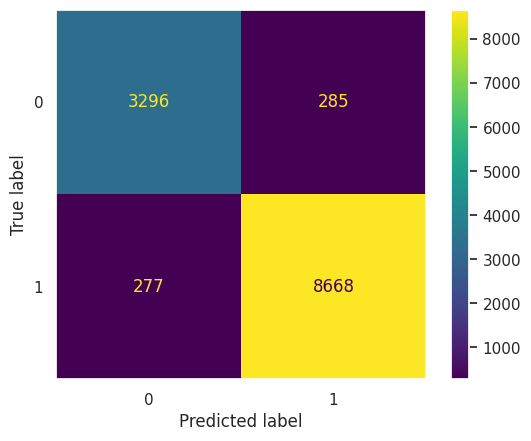

In [30]:
def plot_cm(model, x_test):
  y_preds = tf.round(model.predict(x_test))
  cm = confusion_matrix(y_true=y_test, y_pred=y_preds)
  ConfusionMatrixDisplay(cm).plot();
  plt.grid(False);

plot_cm(model_baseline, x_test)

392/392 [==============================] - 1s 2ms/step


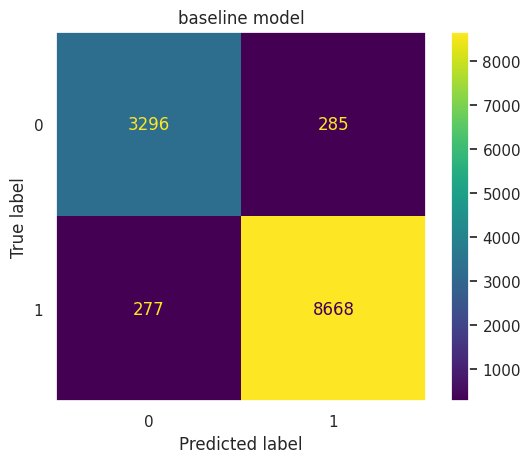

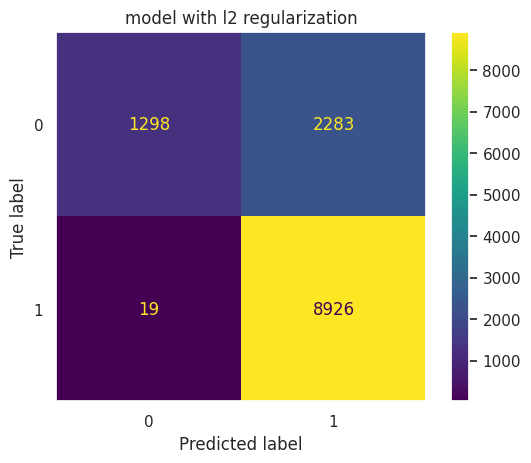

In [31]:
plot_cm(model_baseline, x_test);
plt.title('baseline model');
# 
plot_cm(model_L2, x_test);
plt.title('model with l2 regularization');

lets try to increase the model complexity so it can reduce false positives

In [32]:
model_complex_L2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(12, )),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer='L2'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_complex_L2.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

history_complex_L2 = model_complex_L2.fit(x_train, y_train, epochs=10)
print('model_complex with L2 regularization evaluation:\n')
acc_complex_L2 = model_complex.evaluate(x_test, y_test)

Epoch 1/10
1566/1566 [==============================] - 9s 4ms/step - loss: 18.2371 - accuracy: 0.8504
Epoch 2/10
1566/1566 [==============================] - 7s 5ms/step - loss: 2.8020 - accuracy: 0.8925
Epoch 3/10
1566/1566 [==============================] - 7s 5ms/step - loss: 1.0816 - accuracy: 0.9049
Epoch 4/10
1566/1566 [==============================] - 7s 4ms/step - loss: 0.5344 - accuracy: 0.9313
Epoch 5/10
1566/1566 [==============================] - 7s 5ms/step - loss: 0.4437 - accuracy: 0.9305
Epoch 6/10
1566/1566 [==============================] - 7s 4ms/step - loss: 0.3508 - accuracy: 0.9375
Epoch 7/10
1566/1566 [==============================] - 7s 5ms/step - loss: 0.2914 - accuracy: 0.9376
Epoch 8/10
1566/1566 [==============================] - 7s 5ms/step - loss: 0.3289 - accuracy: 0.9365
Epoch 9/10
1566/1566 [==============================] - 7s 4ms/step - loss: 0.2039 - accuracy: 0.9544
Epoch 10/10
1566/1566 [==============================] - 7s 5ms/step - loss: 0.15

392/392 [==============================] - 1s 2ms/step


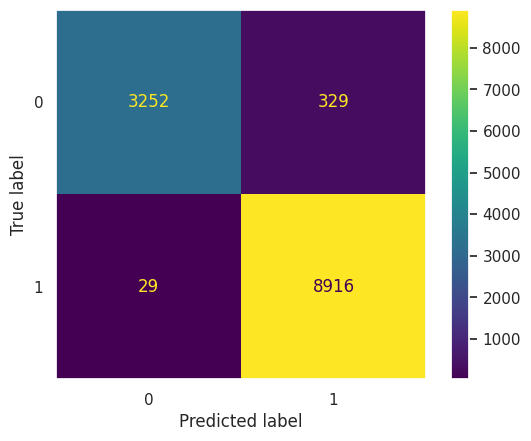

In [33]:
plot_cm(model_complex_L2, x_test)

In [34]:
# do more epochs...
model_complex_L2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(12, )),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer='L2'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_complex_L2.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

history_complex_L2 = model_complex_L2.fit(x_train, y_train, epochs=20)
print('model_complex with L2 regularization evaluation:\n')
acc_complex_L2 = model_complex.evaluate(x_test, y_test)

Epoch 1/20
1566/1566 [==============================] - 9s 5ms/step - loss: 14.3504 - accuracy: 0.8221
Epoch 2/20
1566/1566 [==============================] - 7s 4ms/step - loss: 1.6145 - accuracy: 0.8898
Epoch 3/20
1566/1566 [==============================] - 8s 5ms/step - loss: 0.7184 - accuracy: 0.9099
Epoch 4/20
1566/1566 [==============================] - 8s 5ms/step - loss: 0.5961 - accuracy: 0.9135
Epoch 5/20
1566/1566 [==============================] - 7s 4ms/step - loss: 0.3720 - accuracy: 0.9219
Epoch 6/20
1566/1566 [==============================] - 7s 5ms/step - loss: 0.3006 - accuracy: 0.9303
Epoch 7/20
1566/1566 [==============================] - 7s 5ms/step - loss: 0.5001 - accuracy: 0.9232
Epoch 8/20
1566/1566 [==============================] - 7s 4ms/step - loss: 0.4993 - accuracy: 0.9243
Epoch 9/20
1566/1566 [==============================] - 7s 5ms/step - loss: 0.2289 - accuracy: 0.9361
Epoch 10/20
1566/1566 [==============================] - 7s 4ms/step - loss: 0.18

392/392 [==============================] - 1s 2ms/step


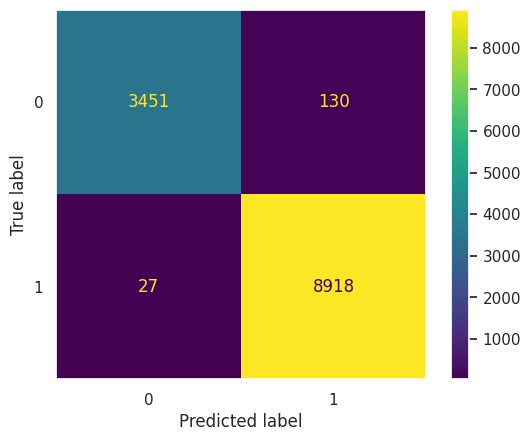

In [35]:
plot_cm(model_complex_L2, x_test)

lets compare the best performing models

392/392 [==============================] - 1s 2ms/step
complex model metrics:
 [0.0761551484465599, 0.9760498404502869]
complex model with regularization metrics:
 [0.0761551484465599, 0.9760498404502869]


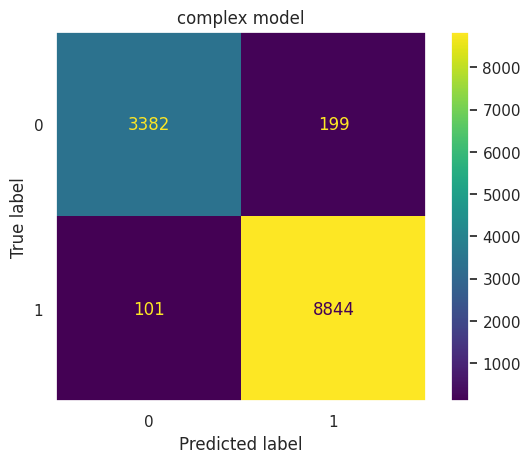

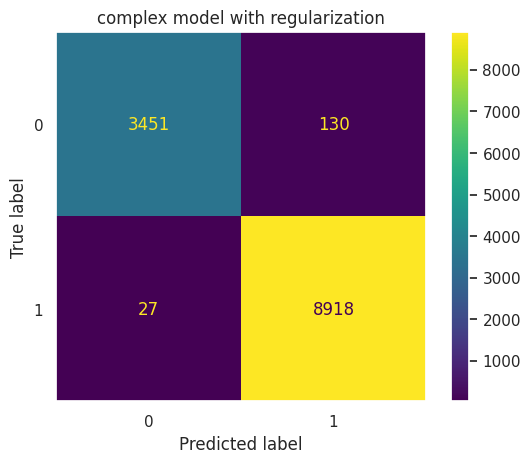

In [36]:
plot_cm(model_complex, x_test)
plt.title('complex model')
plot_cm(model_complex_L2, x_test)
plt.title('complex model with regularization');
print('complex model metrics:\n', acc_complex)
print('complex model with regularization metrics:\n', acc_complex_L2)

In [37]:
# add dropout to further reduce variance
model_complex_L2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(12, )),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer='L2'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_complex_L2.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

history_complex_L2 = model_complex_L2.fit(x_train, y_train, epochs=20)
print('model_complex with L2 regularization evaluation:\n')
acc_complex_L2 = model_complex.evaluate(x_test, y_test)

Epoch 1/20
1566/1566 [==============================] - 9s 5ms/step - loss: 13.2682 - accuracy: 0.8219
Epoch 2/20
1566/1566 [==============================] - 7s 4ms/step - loss: 0.9777 - accuracy: 0.8605
Epoch 3/20
1566/1566 [==============================] - 8s 5ms/step - loss: 0.8848 - accuracy: 0.7786
Epoch 4/20
1566/1566 [==============================] - 8s 5ms/step - loss: 0.8610 - accuracy: 0.7483
Epoch 5/20
1566/1566 [==============================] - 7s 4ms/step - loss: 0.8563 - accuracy: 0.7487
Epoch 6/20
1566/1566 [==============================] - 7s 5ms/step - loss: 0.7898 - accuracy: 0.7470
Epoch 7/20
1566/1566 [==============================] - 7s 5ms/step - loss: 0.6622 - accuracy: 0.7445
Epoch 8/20
1566/1566 [==============================] - 7s 4ms/step - loss: 0.6143 - accuracy: 0.7460
Epoch 9/20
1566/1566 [==============================] - 8s 5ms/step - loss: 0.5935 - accuracy: 0.7445
Epoch 10/20
1566/1566 [==============================] - 7s 4ms/step - loss: 0.56

392/392 [==============================] - 1s 2ms/step


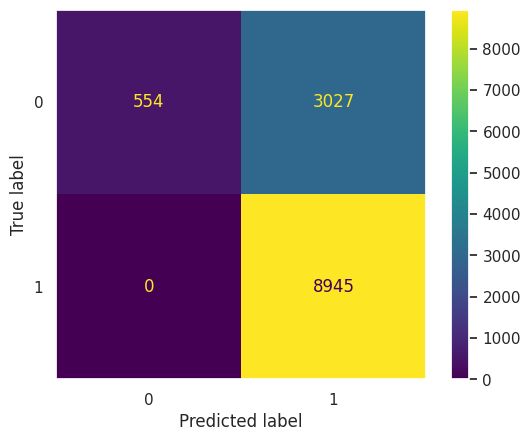

In [38]:
plot_cm(model_complex_L2, x_test)

the model has signficantly improved and has better metrics, lets compare the baseline model and regularized complex model

392/392 [==============================] - 1s 2ms/step
baseline model loss:0.11
baseline model acc :0.96
_________________________________________________

reg cmplx model loss:0.08
reg cmplx model acc:0.98
_________________________________________________



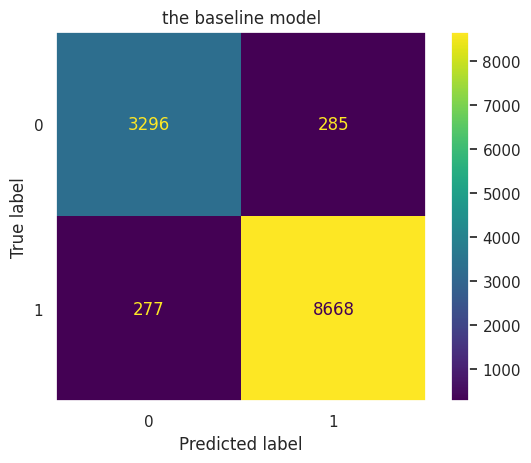

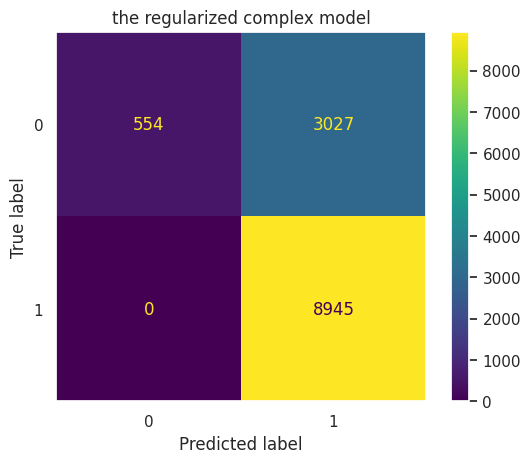

In [39]:
plot_cm(model_baseline, x_test);
plt.title('the baseline model');
plot_cm(model_complex_L2, x_test);
plt.title('the regularized complex model');
print(f'baseline model loss:{acc_baseline[0]:.2f}')
print(f'baseline model acc :{acc_baseline[1]:.2f}')
print('_________________________________________________')
print()
print(f'reg cmplx model loss:{acc_complex_L2[0]:.2f}')
print(f'reg cmplx model acc:{acc_complex_L2[1]:.2f}')
print('_________________________________________________')
print()

if we look at the confusion matrix we can see that despite the class imbalance that we have significantly improved the performance of it.

we can try to balance the classes and check how well the testing accuracy improves.

In [40]:
# lets check the total of both classes on each training and testing
print(f'size of class 1 in training data: {(y_train.sum() / y_train.shape[0]):.2f}%')
print(f'size of class 1 in testing data: {(y_test.sum() / y_test.shape[0]):.2f}%')

size of class 1 in training data: 0.71%
size of class 1 in testing data: 0.71%


# experiment: undersampling
since we have sufficient samples in the testing data we can try to undersample the positive class



In [41]:
# install imbalanced-learn
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
from imblearn.under_sampling import RandomUnderSampler

In [43]:
undersampler = RandomUnderSampler(sampling_strategy='majority')
x_under, y_under = undersampler.fit_resample(X, y)
x_train_under, x_test_under, y_train_under, y_test_under = train_test_split(x_under, y_under, test_size=.2, random_state=21)

In [44]:
# check percentage of classes
print(f'size of the positive class: {(y_train_under.sum()/y_train_under.shape[0]):.2f}%')

size of the positive class: 0.50%


In [45]:
# retrain the model of the balanced datasets
history_complex_L2 = model_complex_L2.fit(x_train_under, y_train_under, epochs=20)
print('model_complex with L2 regularization evaluation:\n')
acc_complex_L2 = model_complex_L2.evaluate(x_test_under, y_test_under)

Epoch 1/20
894/894 [==============================] - 4s 5ms/step - loss: 0.4562 - accuracy: 0.7308
Epoch 2/20
894/894 [==============================] - 4s 5ms/step - loss: 0.3753 - accuracy: 0.8110
Epoch 3/20
894/894 [==============================] - 5s 5ms/step - loss: 0.3642 - accuracy: 0.8589
Epoch 4/20
894/894 [==============================] - 4s 5ms/step - loss: 0.3137 - accuracy: 0.8804
Epoch 5/20
894/894 [==============================] - 5s 5ms/step - loss: 0.3190 - accuracy: 0.8530
Epoch 6/20
894/894 [==============================] - 4s 5ms/step - loss: 0.2819 - accuracy: 0.8877
Epoch 7/20
894/894 [==============================] - 4s 4ms/step - loss: 0.2609 - accuracy: 0.9015
Epoch 8/20
894/894 [==============================] - 5s 5ms/step - loss: 0.2556 - accuracy: 0.9121
Epoch 9/20
894/894 [==============================] - 4s 5ms/step - loss: 0.2112 - accuracy: 0.9278
Epoch 10/20
894/894 [==============================] - 4s 5ms/step - loss: 0.1972 - accuracy: 0.9334

224/224 [==============================] - 0s 2ms/step


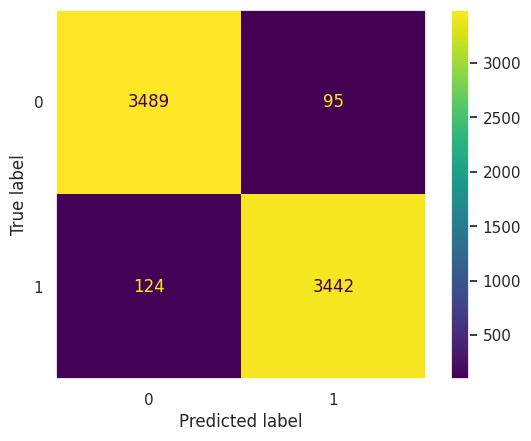

In [47]:
y_preds = tf.round(model_complex_L2.predict(x_test_under))
cm = confusion_matrix(y_true=y_test_under, y_pred=y_preds)
ConfusionMatrixDisplay(cm).plot();
plt.grid(False);

In [48]:
acc_complex_L2_undersampled = model_complex_L2.evaluate(x_test_under,y_test_under)

224/224 [==============================] - 1s 3ms/step - loss: 0.1322 - accuracy: 0.9694


In [49]:
# result of the final experiment
print(f'reg cmplx undrsmpl  model loss:{acc_complex_L2_undersampled[0]:.2f}')
print(f'reg cmplx undrsmpl  model acc :{acc_complex_L2_undersampled[1]:.2f}')
print('_________________________________________________')
print()

reg cmplx undrsmpl  model loss:0.13
reg cmplx undrsmpl  model acc :0.97
_________________________________________________



# Final results:
**baseline** model           
> loss:0.18

> acc :0.92
---
**reg cmplx** model     
> model loss:0.12

> model acc:0.95
---
**reg cmplx undrsmpl** model
> loss:0.03

> acc :0.99

As we can see from the results the experiments, identifying the problems that were present in the dataset such as class imbalance and implementing the right fix for it has significantly improved the model performance.